# Fronteira de pareto - análise multiobjetivo

### A Fronteira de pareto tem como objetivo selecionar as amostragens que foram superiores as demais levando em conta múltiplas variáveis 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Função que identifica a fronteira de pareto

In [8]:
def identify_pareto(scores):
    # Quantidade de modelos
    population_size = scores.shape[0]
    # Cria um indíce para a potuação da fronteira de pareto
    population_ids = np.arange(population_size)
    # Cria uma lista onde todos os item iniciam na fronteira de Pareto
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop para comprarar todos os itens
    for i in range(population_size):
        for j in range(population_size):
            # Verifica se `i` é dominado por `j`
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                # `i` é demonado por `j`, então da fronteira
                pareto_front[i] = 0
                break
    # Retorna os índices da fronteira de Pareto
    return population_ids[pareto_front]

## Função para excutar a identificação da fronteira

In [29]:
def pareto_teste(pareto_list, names):
    scores = np.array(pareto_list)
    x = scores[:, 1]
    y = scores[:, 0]

    pareto = identify_pareto(scores)
    print ('Pareto front index vales')
    print ('Points on Pareto front: \n',pareto)

    pareto_front = scores[pareto]
    print ('\nPareto front scores')
    print (pareto_front)

    pareto_front_df = pd.DataFrame(pareto_front)
    pareto_front_df.sort_values(0, inplace=True)
    pareto_front = pareto_front_df.values

    x_all = scores[:, 1]
    y_all = scores[:, 0]
    x_pareto = pareto_front[:, 1]
    y_pareto = pareto_front[:, 0]
    
    return x_pareto, y_pareto

## Função para plotar o gráfico da fronteira

In [33]:
def pareto_plot(scores,x_pareto,y_pareto):
    plt.figure(figsize=(15,7))
    for i in range(len(scores)):
        x = scores[i][1]
        y = scores[i][0]
        if(x in x_pareto and y in y_pareto):
          pareto, = plt.plot(x, y, 'go')
          plt.text(x+0.025, y-0.007, names[i], fontsize=12)
        else:
          n_pareto, = plt.plot(x, y, 'bo')
          plt.text(x+0.025, y-0.04, names[i], fontsize=12)

    leg = plt.legend([pareto,n_pareto],['Ótimo de pareto', 'Não-ótimo de pareto'], loc='lower left')
    colors=['blue', 'red']
    for i, j in enumerate(leg.legendHandles):
        j.set_color(colors[i])
    
    plt.plot(x_pareto, y_pareto, color='r')
    plt.title('Análise multi-objetivo')
    plt.xlabel('Variável A')
    plt.ylabel('Variável B')
    plt.show()

In [34]:
#Chamando as funções da análise
names = ['A','B','C','D','E','F','G','H','I','J']
scores = np.array([
 [97, 23],
 [55, 63],
 [80, 60],
 [99,  4],
 [26, 70],
 [30, 75],
 [15, 80],
 [66, 65],
 [90, 68]])

x_pareto, y_pareto = pareto_teste(scores,names)

Pareto front index vales
Points on Pareto front: 
 [0 3 5 6 8]

Pareto front scores
[[97 23]
 [99  4]
 [30 75]
 [15 80]
 [90 68]]


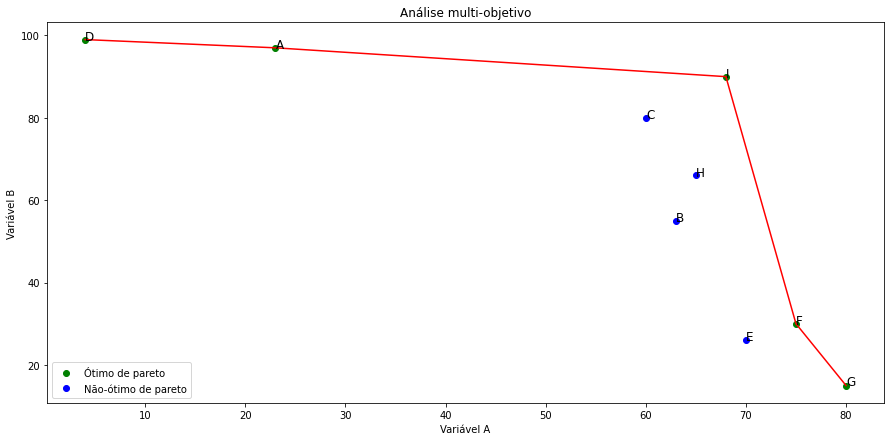

In [35]:
#Plotando o gráfico da fronteira
pareto_plot(scores,x_pareto,y_pareto)